<a href="https://colab.research.google.com/github/Eeshasr/cnn-lung-project/blob/main/CNN_lung_problem_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os #operating system
import cv2 
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers 
from tensorflow.keras.applications.resnet50  import ResNet50 # for transfer learning
from tensorflow.keras.layers import Input,Add, Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout 
from tensorflow.keras.models import Model,load_model
from tensorflow.keras import backend as k 
from tensorflow.keras.preprocessing.image import ImageDataGenerator # to generate batches of image from directroy
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd # data farame manipulation



#load data

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# specify training data directory
X_ray_directory = '/content/drive/MyDrive/ Data Science Projects /CNN: for operation management /Dataset'

In [ ]:
#list the folders in directory
os.listdir(X_ray_directory)

['3', '2', '0', '1']

In [ ]:
# Use I mage generator to generate tensor images data and normalize them
# use 20% of the data for cross - validation
image_generator  = ImageDataGenerator(rescale= 1/.255, validation_split= 0.2)

In [ ]:

# Generate batch of 40 images 
# Total number of images is 133*4 = 532 images 
# Total number is 428 (80%) and vlaidation is 104
# Perfrom shuffling and image resizing
train_generator = image_generator.flow_from_directory(batch_size= 40,directory= X_ray_directory, shuffle= True ,target_size=(256,256),class_mode= 'categorical', subset="training")



Found 428 images belonging to 4 classes.


In [ ]:
validatation_generator = image_generator.flow_from_directory(batch_size= 40,directory= X_ray_directory, shuffle= True ,target_size=(256,256),class_mode= 'categorical', subset="validation")


Found 104 images belonging to 4 classes.


In [ ]:
#generate a batch of 40 images and labels
train_images, train_labels = next(train_generator)

In [ ]:
train_generator.filenames

['0/2B8649B2-00C4-4233-85D5-1CE240CF233B.jpeg',
 '0/2C10A413-AABE-4807-8CCE-6A2025594067.jpeg',
 '0/2C26F453-AF3B-4517-BB9E-802CF2179543.jpeg',
 '0/31BA3780-2323-493F-8AED-62081B9C383B.jpeg',
 '0/353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB.jpeg',
 '0/35AF5C3B-D04D-4B4B-92B7-CB1F67D83085.jpeg',
 '0/396A81A5-982C-44E9-A57E-9B1DC34E2C08.jpeg',
 '0/39EE8E69-5801-48DE-B6E3-BE7D1BCF3092.jpeg',
 '0/3ED3C0E1-4FE0-4238-8112-DDFF9E20B471.jpeg',
 '0/41591_2020_819_Fig1_HTML.webp-day10.png',
 '0/41591_2020_819_Fig1_HTML.webp-day5.png',
 '0/446B2CB6-B572-40AB-B01F-1910CA07086A.jpeg',
 '0/44C8E3D6-20DA-42E9-B33B-96FA6D6DE12F.jpeg',
 '0/4C4DEFD8-F55D-4588-AAD6-C59017F55966.jpeg',
 '0/5931B64A-7B97-485D-BE60-3F1EA76BC4F0.jpeg',
 '0/5A78BCA9-5B7A-440D-8A4E-AE7710EA6EAD.jpeg',
 '0/5CBC2E94-D358-401E-8928-965CCD965C5C.jpeg',
 '0/5e6dd879fde9502400e58b2f.jpeg',
 '0/66298CBF-6F10-42D5-A688-741F6AC84A76.jpeg',
 '0/6A7D4110-2BFC-4D9A-A2D6-E9226D91D25A.jpeg',
 '0/6C94A287-C059-46A0-8600-AFB95F4727B7.jpeg',
 '0/6CB4E

In [ ]:
train_images.shape

(40, 256, 256, 3)

In [ ]:
train_labels.shape

(40, 4)

In [ ]:
train_labels

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]],

In [ ]:
# labels Translator 
label_names = {0 : 'Covid-19', 1 : 'Normal' , 2: 'Viral Pneumonia', 3 : 'Bacterial Pneumonia'}

#Visualize Data


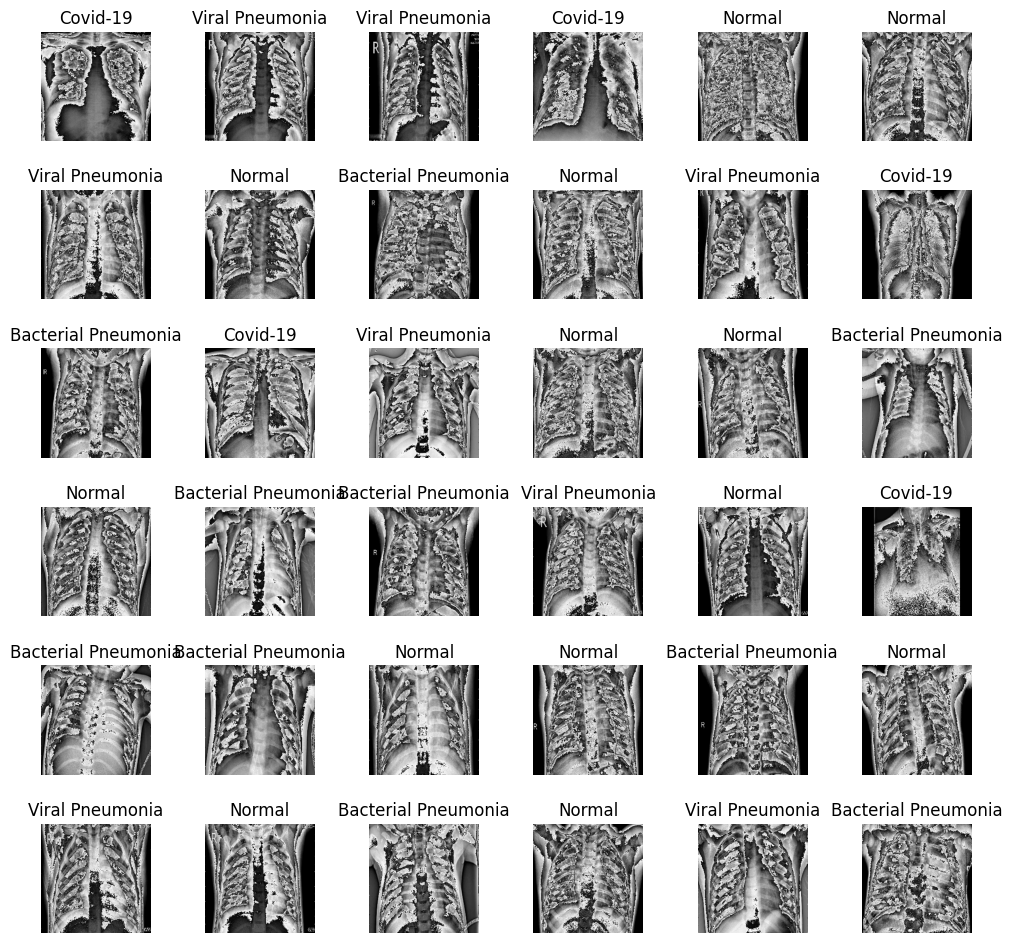

In [ ]:
L = 6
W = 6

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i].astype(np.uint8))
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5) 


#Importing ResNet50

In [ ]:
 basemodel = ResNet50(weights = 'imagenet', include_top= False , input_tensor = Input(shape = (256,256,3)))


94765736/94765736 [==============================] - 1s 0us/step


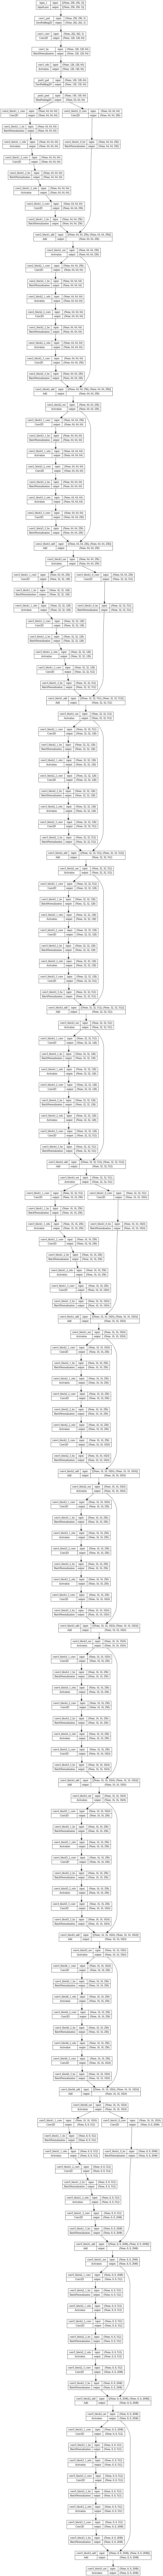

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model( model = basemodel, show_shapes= True)

In [ ]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
#freezing layers in the model
for layer in  basemodel.layers[:-10]:
  layers.trainable = False 

#build and train deeplearning model over resnet 50

In [ ]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel = Flatten( name = 'flatten')(headmodel)
headmodel = Dense(256, activation= 'relu')(headmodel)
headmodel = Dropout(0.3)(headmodel) # helps to generalize the model instead of overfitting
headmodel = Dense(256, activation= 'relu')(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(4, activation = 'softmax')(headmodel)



In [ ]:
model = Model(inputs = basemodel.input,outputs = headmodel)

In [ ]:
model.compile(loss= 'categorical_crossentropy',optimizer= optimizers.RMSprop(learning_rate = 1e-4),metrics =['accuracy'])

In [ ]:
#early stoping 
earlystopping = EarlyStopping(monitor= 'val_loss',mode ='min',patience =20)
#save the best model with lower validation
checkpointer = ModelCheckpoint(filepath='weights.hdf5',verbose =1, save_best_only=True)

In [ ]:
train_generator = image_generator.flow_from_directory(batch_size= 4, directory=X_ray_directory,shuffle=True,target_size=(256,256),class_mode='categorical',subset='training')
Validation_generator = image_generator.flow_from_directory(batch_size= 4, directory=X_ray_directory,shuffle=True,target_size=(256,256),class_mode='categorical',subset='validation')

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [ ]:
history = model.fit(train_generator, steps_per_epoch=30, epochs= 10 , validation_data =Validation_generator)

Epoch 1/10
30/30 [==============================] - 179s 6s/step - loss: 0.2713 - accuracy: 0.9083 - val_loss: 3.4439 - val_accuracy: 0.6827
Epoch 2/10
30/30 [==============================] - 165s 5s/step - loss: 0.1663 - accuracy: 0.9417 - val_loss: 0.9263 - val_accuracy: 0.9135
Epoch 3/10
30/30 [==============================] - 177s 6s/step - loss: 0.1358 - accuracy: 0.9667 - val_loss: 4.0709 - val_accuracy: 0.7212
Epoch 4/10
30/30 [==============================] - 167s 6s/step - loss: 0.1938 - accuracy: 0.9583 - val_loss: 6.2409 - val_accuracy: 0.7885
Epoch 5/10
30/30 [==============================] - 181s 6s/step - loss: 0.0701 - accuracy: 0.9833 - val_loss: 1.7376 - val_accuracy: 0.9038
Epoch 6/10
30/30 [==============================] - 181s 6s/step - loss: 0.0938 - accuracy: 0.9583 - val_loss: 2.6861 - val_accuracy: 0.7981
Epoch 7/10
30/30 [==============================] - 176s 6s/step - loss: 0.1191 - accuracy: 0.9417 - val_loss: 2.6810 - val_accuracy: 0.8942
Epoch 8/10
30



#evaluating deep learning model

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
     values =  history.history
     values

{'loss': [0.27132728695869446,
  0.1663491129875183,
  0.1358192414045334,
  0.19376373291015625,
  0.07007917761802673,
  0.09376511722803116,
  0.11912690848112106,
  0.3006923496723175,
  0.10021980106830597,
  0.17922362685203552],
 'accuracy': [0.9083333611488342,
  0.9416666626930237,
  0.9666666388511658,
  0.9583333134651184,
  0.9833333492279053,
  0.9583333134651184,
  0.9416666626930237,
  0.9833333492279053,
  0.9666666388511658,
  0.949999988079071],
 'val_loss': [3.4439454078674316,
  0.9263086915016174,
  4.070869445800781,
  6.240874767303467,
  1.737622618675232,
  2.6861205101013184,
  2.68099308013916,
  0.8468064665794373,
  0.8497228622436523,
  0.8866963982582092],
 'val_accuracy': [0.682692289352417,
  0.9134615659713745,
  0.7211538553237915,
  0.7884615659713745,
  0.9038461446762085,
  0.7980769276618958,
  0.8942307829856873,
  0.9134615659713745,
  0.8557692170143127,
  0.875]}

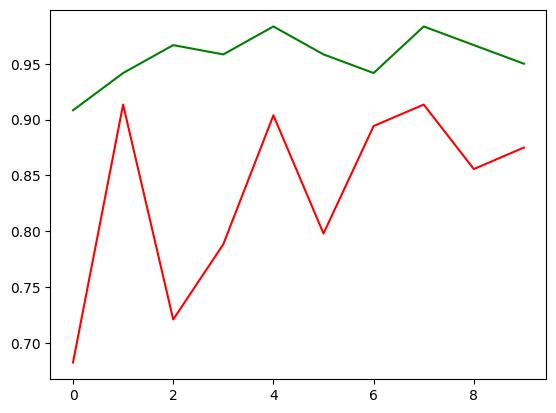

In [ ]:
loss_value = values['loss']
accuracy = values['accuracy']
val_loss = values['val_loss']
val_acc = values['val_accuracy']
plt.plot( accuracy,'g', label= 'training acc')
plt.plot( val_acc,'r', label= 'test acc')

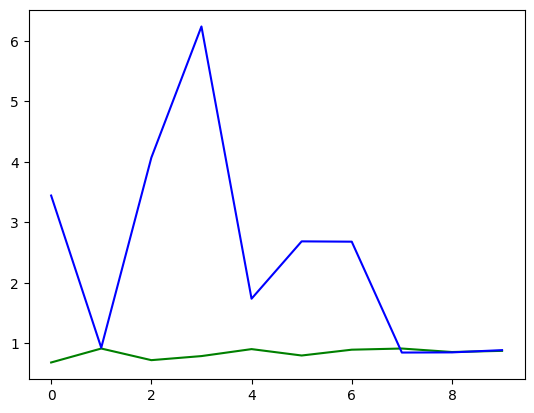

In [ ]:
plt.plot(history.history['val_accuracy'],'g')
plt.plot(history.history['val_loss'],'b')

#finetuning hyper parameters using ramndom search cv method 

In [ ]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel = Flatten( name = 'flatten')(headmodel)
headmodel = Dense(256, activation= 'relu')(headmodel)
headmodel = Dropout(0.3)(headmodel) # helps to generalize the model instead of overfitting
headmodel = Dense(256, activation= 'relu')(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(4, activation = 'softmax')(headmodel)

In [ ]:

def headmodel_10 (units = 256,rate = 0.3):
  headmodel = basemodel.output
  headmodel_1 = AveragePooling2D(pool_size=(4,4))(headmodel)
  headmodel_2 = Flatten( name = 'flatten')(headmodel_1)
  headmodel_3 = Dense(units, activation= 'relu')(headmodel_2)
  headmodel_4 = Dropout(rate)(headmodel_3) # helps to generalize the model instead of overfitting
  headmodel_5 = Dense(units, activation= 'relu')(headmodel_4)
  headmodel_6 = Dropout(rate)(headmodel_5)
  headmodel = Dense(4, activation = 'softmax')(headmodel_6)
  model = Model(inputs = basemodel.input,outputs = headmodel_10)
  model.compile(loss= 'categorical_crossentropy',optimizer= optimizers.RMSprop(learning_rate= 1e-4),metrics =['accuracy'])
  return model
 



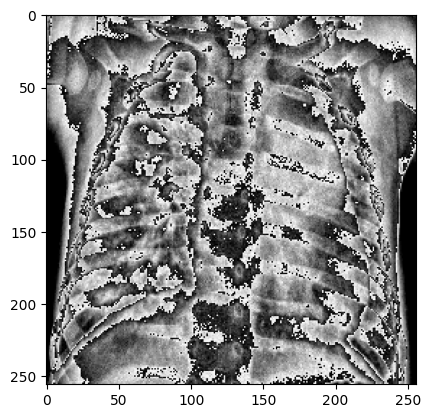

In [ ]:
plt.imshow(train_images[i].astype(np.uint8))

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
keras_Class = KerasClassifier(headmodel_10)

<ipython-input-15-6fb108d140f3>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_Class = KerasClassifier(headmodel_10)


AttributeError: ignored

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
pharms_distri = {'units' : np.arange(300,600),
          'rate' : reciprocal(3e-4,3e-1)
}

rnd_search = RandomizedSearchCV(keras_Class,pharms_distri,n_iter = 2,cv=3, error_score= 'raise')
rnd_search.fit(train_generator.train_images,train_generator.train_labels,steps_per_epoch = 10 ,epochs = 5,validation_data = validatation_generator)


AttributeError: ignored

In [ ]:
reciprocal(0.1,0.6)

In [ ]:
np.arange(300,600)

array([300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390,
       391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403,
       404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416,
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 48